<a href="https://colab.research.google.com/github/Tarnished2/FisikaLaboratorium/blob/main/GetaranGelombang/W3_PolarimetriCahaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pramaditya Ardian Saputra
- 5001201061

# Import library dan membuat path

In [1]:
# import library yang dibutuhkan
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Membuat path untuk mengidentifikasi letak directory
path = '/content/gdrive/MyDrive/datafislab/'
file_name = 'PolarimetriCahaya.xlsx'

# Cek directory
os.listdir(path)

['GetaranTeredam.xlsx', 'EksperimenMelde.xlsx', 'PolarimetriCahaya.xlsx']

# Read Data

In [5]:
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
data['Massa Larutan'] = [10, 20]
data

,Larutan,Sudut rotasi,Massa Larutan
0,Larutan 10 gr,99.5,10
1,Larutan 20 gr,167.4,20


# Persamaan yang digunakan

## 1. Konsentrasi Larutan Eksperimen

$$ C=\frac{m}{V} $$

In [7]:
V = 1
data['Konsentrasi Larutan Eksperimen'] = data['Massa Larutan'] / V
data

,Larutan,Sudut rotasi,Massa Larutan,Konsentrasi Larutan Eksperimen
0,Larutan 10 gr,99.5,10,10.0
1,Larutan 20 gr,167.4,20,20.0


## 2. Konsentrasi Larutan Teori

$$ C = \frac{100α}{l[α]_D^T} $$


In [9]:
data['Konsentrasi Larutan Teori'] = (100 * data['Sudut rotasi']) / (data['Massa Larutan'] * 66.37)
data

,Larutan,Sudut rotasi,Massa Larutan,Konsentrasi Larutan Eksperimen,Konsentrasi Larutan Teori
0,Larutan 10 gr,99.5,10,10.0,14.991713
1,Larutan 20 gr,167.4,20,20.0,12.611119


## 3. Sudut Rotasi Spesifik

$$ [α]_D^T = \frac{100α}{lC} $$


In [10]:
data['Sudut Rotasi Spesifik'] = (100 * data['Sudut rotasi']) / (data['Massa Larutan']*data['Konsentrasi Larutan Teori'])
data

,Larutan,Sudut rotasi,Massa Larutan,Konsentrasi Larutan Eksperimen,Konsentrasi Larutan Teori,Sudut Rotasi Spesifik
0,Larutan 10 gr,99.5,10,10.0,14.991713,66.37
1,Larutan 20 gr,167.4,20,20.0,12.611119,66.37


## 4. Eror

$$ C_{error} = \left| \frac{{C_{eksperimen} - C_{hitung}}}{{C_{eksperimen}}} \right| \times 100\% $$


In [13]:
data['Eror'] = abs((data['Konsentrasi Larutan Eksperimen'] - data['Konsentrasi Larutan Teori']) / data['Konsentrasi Larutan Eksperimen']) * 100.0
data

,Larutan,Sudut rotasi,Massa Larutan,Konsentrasi Larutan Eksperimen,Konsentrasi Larutan Teori,Sudut Rotasi Spesifik,Eror
0,Larutan 10 gr,99.5,10,10.0,14.991713,66.37,49.917131
1,Larutan 20 gr,167.4,20,20.0,12.611119,66.37,36.944403


## 5. Plot Grafik

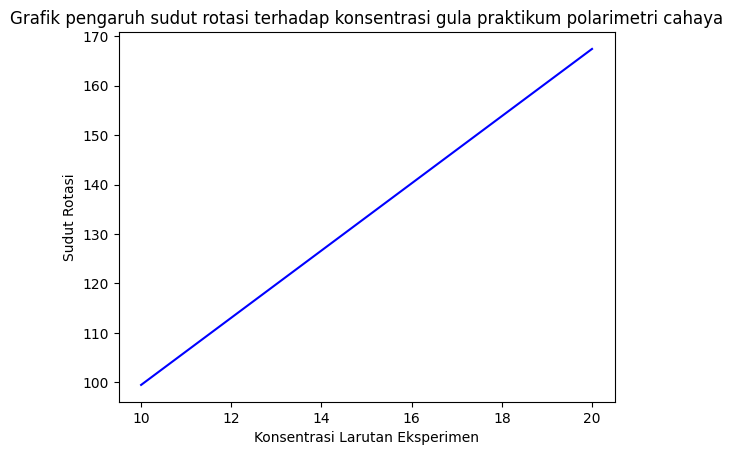

In [15]:
x = data['Konsentrasi Larutan Eksperimen']
y = data['Sudut rotasi']
plt.plot(x, y, color='blue')
plt.xlabel('Konsentrasi Larutan Eksperimen')
plt.ylabel('Sudut Rotasi')
plt.title('Grafik pengaruh sudut rotasi terhadap konsentrasi gula praktikum polarimetri cahaya')
plt.show()